# Assignment #3 - Neural Networks

<font color="blue"><b> Abdullah Al Raqibul Islam </b></font>

# INDEX

I. Overview<br/>
II. Data<br/>
&emsp;&emsp;II.I. Introduction of Regression Data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.I. Reading the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.II. Preprocessing of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.IV. Preliminary observation<br/>
&emsp;&emsp;II.II. Introduction of Classification Data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.I. Reading the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.II. Preprocessing of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.IV. Preliminary observation<br/>
&emsp;&emsp;&emsp;&emsp;II.II.V. Preprocessing for Classification<br/>
III. Methods<br/>
&emsp;&emsp;III.I 5-fold Cross Validation<br/>
&emsp;&emsp;III.II Nonlinear Regression<br/>
&emsp;&emsp;III.III Nonlinear Logistic Regression<br/>
IV. Results<br/>
V. Conclusions<br/>
VI.  References<br/>
VII. Extra Credit<br/>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

## II.I. Introduction of Regression Data

This dataset [[1]](https://www.kaggle.com/harlfoxem/housesalesprediction) contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset have 21613 rows and 21 attributes. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   id (int64)
 1.   date (object)
 2.   price (float64)
 3.   bedrooms (int64)
 4.   bathrooms (float64)
 5.   sqft_living (int64)
 6.   sqft_lot (int64)
 7.   floors (float64)
 8.   waterfront (int64)
 9.   view (int64)
 10.  condition (int64)
 11.  grade (int64)
 12.  sqft_above (int64)
 13.  sqft_basement (int64)
 14.  yr_built (int64)
 15.  yr_renovated (int64)
 16.  zipcode (int64)
 17.  lat (float64)
 18.  long (float64)
 19.  sqft_living15 (int64)
 20.  sqft_lot15 (int64)

### II.I.I. Reading the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_r = pd.read_csv("data/regression/kc_house_data.csv")

# displaying all the columns data of top 5 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_r.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### II.I.II. Preprocessing of the data

In [4]:
# get the metadata; getting familiarized with columns and data-types
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From the "Non-Null Count" column above, we can observe all the rows contain same number of `non-null` counts. From this count we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [6]:
# checking columns with null values
df_r.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

In [7]:
# observe pairwise correlation of columns using library function
df_r.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Non-numeric data type columns from the dataframe is ignored (i.e. "date" column in this case).

This correlation matrix gives the measure of the strength of the association between the two columns. I used Pearson's Correlation Coefficient method to generate this matrix.

### II.I.III. Visualization of the data

#### II.I.III.I. Correlation Heatmap
Corelation heatmap is provided bellow. Here I am listing my observations from the correlation heatmap:
1. The most correlated attributes with `price` are
    * bathrooms
    * sqft_living
    * view
    * grade
    * sqft_above
    * sqft_living15
2. Among them all, `sqft_living` and `grade` have the highest correlation coefficient (`0.7`).
3. This actually makes sense, as this data is suitable for `regrassion analysis` and house price mostly depends on the `size` and `quality`.


<font color="red">todo: will add rest of the visualization later ...</font>

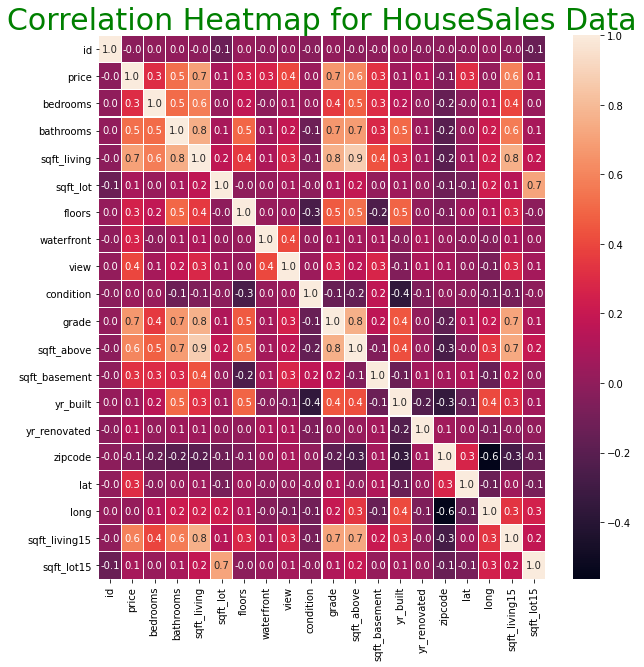

In [8]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_r.corr(method='pearson'), annot=True, linewidths=.1,fmt= '.1f')
plt.title("Correlation Heatmap for HouseSales Data", color = 'green', fontsize = 30)
plt.show()

### II.I.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize

* People mostly like houses with the following property -
    * Three bedroom
    * Condition 3
    * Seventh grade
    * 2.5 Bathrooms
    * Without waterfront
    * View 0
* This is actually true as we have observed from the linear regression graph that `with waterfront` price is prety high.

## II.II. Introduction of Classification Data

This dataset [[2]](https://www.kaggle.com/lodetomasi1995/income-classification) contains person's income information with 14 attributes. The dataset have `32561` rows in total. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   age (int64) 
 1.   workclass (object)
 2.   fnlwgt (int64)
 3.   education (object)
 4.   education-num (int64)
 5.   marital-status (object)
 6.   occupation (object)
 7.   relationship (object)
 8.   race (object)
 9.   sex (object)
 10.  capital-gain (int64)
 11.  capital-loss (int64)
 12.  hours-per-week (int64)
 13.  native-country (object)
 14.  income (object)

### II.II.I. Reading the data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("data/classification/income_evaluation.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_c.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### II.II.II. Preprocessing of the data

In [20]:
# get the metadata; getting familiarized with columns and data-types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the "Non-Null Count" column above, we can observe all the rows contain same number of non-null counts. From this data we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [12]:
# checking columns with null values
df_c.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

But we can observe that a couple of columns contains hypens (`-`). Cleaning up the column names that have `-` in the dataframe.

In [21]:
# clean up column names that have '-' in the dataframe

cols = df_c.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_c.columns = new_column_names

df_c.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Now will check the unique values in the target column (i.e. `income`) and replace the values with more meaningfull name (i.e. `Low-income`, `High-income`).

In [22]:
df_c.loc[df_c['income'] == '<=50K', 'income'] = 'Low-income'
df_c.loc[df_c['income'] == '>50K', 'income'] = 'High-income'

df_c.income.unique()

array(['Low-income', 'High-income'], dtype=object)

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

### II.II.III. Visualization of the data

#### II.II.III.I. Correlation Heatmap

Corelation heatmap is provided bellow. Here I am listing my observations from the correlation heatmap:

1. As `income` is a object type data, we can't retrieve correlation information w.r.t. that. This has been further discussed in section $II.II.V$.


<font color="red">todo: will add rest of the visualization later ...</font>

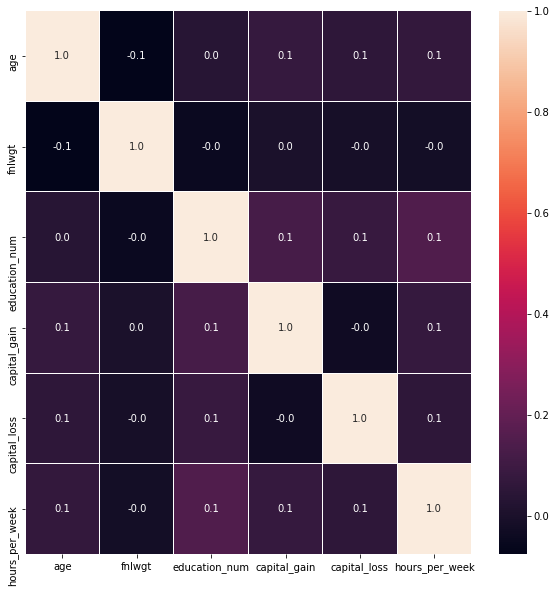

In [23]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

### II.II.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize-

* We observed `gender` and `race` discrimination.
* There are more jobs in the job-market for medium education level (i.e. high-school graduates).
* There is no clear winner for a specific type of jobs; which is true is comparing to the society.

### II.II.V. Preprocessing for Classification

As I am planning to run classification algorithms on this dataset to classify higher and lower income group, I made further data processing to convert the text data to numeric one. This is a prerequisite for the algorithms I implemented and described later.

In [24]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, '?':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, '?':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, '?':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

df_c.replace(encoding_dict, inplace = True)

# observe pairwise correlation of columns using library function
df_c.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.082380,-0.076646,0.007767,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011666,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,0.024188,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education,0.007767,0.011666,0.024188,1.000000,-0.279614,0.008507,0.074961,0.044319,0.029638,0.000550,0.024154,-0.003192,-0.050025,0.067619,-0.046218
education_num,0.036527,0.011343,-0.043195,-0.279614,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital_status,0.424606,0.035949,-0.023527,0.008507,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,0.074961,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,0.044319,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,0.029638,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,0.000550,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980


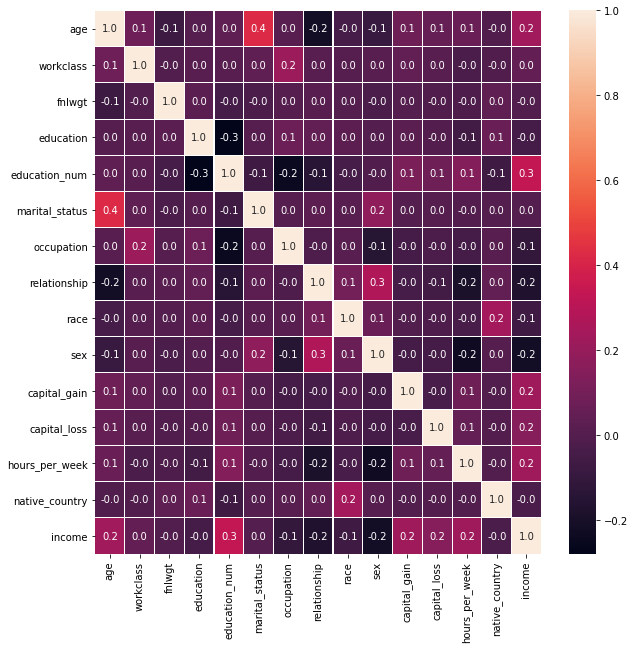

In [25]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# III. Methods

## III.I 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 

## III.II Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 


## III.III Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment). 

In [2]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        pass

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        pass

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        pass


# IV. Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# VI. Reference

1. harlfoxem (2016). House Sales in King County, USA, Version 1. Retrieved September 20, 2020 from https://www.kaggle.com/harlfoxem/housesalesprediction.

2. Lorenzo De Tomasi (2018). Income classification, Prediction task is to determine whether a person makes over 50K a year, Version 1. Retrieved September 22, 2020 from https://www.kaggle.com/lodetomasi1995/income-classification

3. "How to Implement Resampling Methods From Scratch In Python," https://machinelearningmastery.com/implement-resampling-methods-scratch-python/, accessed Nov. 5, 2020.

# VII. Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download **a3.tgz** from Canvas.
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
